<a href="https://colab.research.google.com/github/DavoodSZ1993/Dive_into_Deep_Learning/blob/main/14_3_object_detection_and_bounding_boxes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install d2l==1.0.0-alpha1.post0 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.7 MB/s eta 0:00:00


## 14.3 Object Detection and Bounding Boxes

In [3]:
%matplotlib inline
import torch
from d2l import torch as d2l

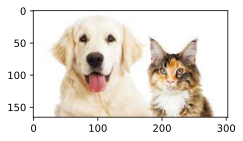

In [9]:
from PIL import Image

d2l.set_figsize()
img = Image.open('catdog.jpg')
d2l.plt.imshow(img);

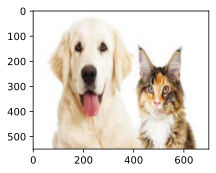

In [11]:
import torchvision.transforms as T

aug = T.Resize((550, 700))
img = aug(img)
d2l.plt.imshow(img);

### 14.3.1 Bounding Boxes

In [16]:
def box_corner_to_center(boxes):
  """Convert from (upper-left, lower-right) to (center, width, height)"""
  x1, y1, x2, y2 = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
  cx = (x1 + x2) / 2
  cy = (y1 + y2) / 2
  w = x2 - x1
  h = y2 - y1
  boxes = torch.stack((cx, cy, w, h), axis=-1)
  return boxes

def box_center_to_corner(boxes):
  """Convert from (center, with, height) to (upper-left, lower-right)"""
  cx, cy, w, h = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
  x1 = cx - 0.5 * w
  y1 = cy - 0.5 * h
  x2 = cx + 0.5 * w
  y2 = cy + 0.5 * h
  boxes = torch.stack((x1, y1, x2, y2), axis=-1)
  return boxes

In [23]:
dog_bbox, cat_bbox = [60.0, 35.0, 378.0, 516.0], [400.0, 112.0, 655.0, 493.0]

In [24]:
boxes = torch.tensor((dog_bbox, cat_bbox))
box_center_to_corner(box_corner_to_center(boxes)) == boxes

tensor([[True, True, True, True],
        [True, True, True, True]])

In [25]:
def bbox_to_rect(bbox, color):
  return d2l.plt.Rectangle(xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0],
                               height=bbox[3]-bbox[1], fill=False, 
                               edgecolor=color, linewidth=2)

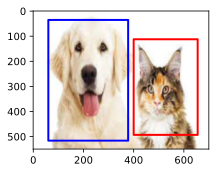

In [26]:
fig = d2l.plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(dog_bbox, 'blue'))
fig.axes.add_patch(bbox_to_rect(cat_bbox, 'red'));